# Customer Churn prediction using machine learning 

## Business Understanding

Customer churn refers to the loss of customers or subscribers for any reason at all. A high churn rate means you are not able to retain customers; therefore, loyalty to your service is low. The telecommunications industry is particularly competitive and characterized by very high churn rates. While companies fiercely compete for customers, market share, and long-term survival, customers tend to switch operators repeatedly due to the lower financial costs associated with switching service providers. Considering that attracting new customers is both difficult and expensive, it is suggested that retaining the most valuable existing customers, and hence avoiding churn, should be given a higher priority than trying to attract new customers. 

### Problem statement
SyriaTel has a significant problem with customer churn, which is the loss of customers who stop using their services. To solve this problem, it needs to identify the customers who are likely to churn and try to keep them. Machine learning models can help telco’s in predicting the customers who are most likely to churn, based on various factors such as customer usage patterns, payment history, and demographics. The goal is to build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel so that the company can take action to retain them.

### Objectives 
* Build a model that predicts customer churn with high recall
* Identify the features that influence customer churn  
* Provide recoomendations to reduce customer churn

### Details on the dataset 
The data set was obtained from Kaggel and contained features such as customer demographics,their usage patterns and payment history which can be used to predict customers who are most likely to churn

### Description of columns
- state: The state where the customer resides.
- phone number: The phone number of the customer.
- international plan: Whether the customer has an international plan (Yes or No).
- voice mail plan: Whether the customer has a voice mail plan (Yes or No).
- area code: The area code associated with the customer's phone number.
- account length: The number of days the customer has been an account holder.
- number vmail messages: The number of voice mail messages received by the customer.
- total day minutes: The total number of minutes the customer used during the day.
- total day calls: The total number of calls made by the customer during the day.
- total day charge: The total charges incurred by the customer for daytime usage.
- total eve minutes: The total number of minutes the customer used during the evening.
- total eve calls: The total number of calls made by the customer during the evening.
- total eve charge: The total charges incurred by the customer for evening usage.
- total night minutes: The total number of minutes the customer used during the night.
- total night calls: The total number of calls made by the customer during the night.
- total night charge: The total charges incurred by the customer for nighttime usage.
- total intl minutes: The total number of international minutes used by the customer.
- total intl calls: The total number of international calls made by the customer.
- total intl charge: The total charges incurred by the customer for international usage.
- customer service calls: The number of customer service calls made by the customer.
- Churn: true if the customer cancelled their contract, otherwise false

### Data undestanding

In [3]:
#import the necessary libraries
# Importing packages for data manipulation
import pandas as pd
import numpy as np

# Importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing packages for modeling and algorithms for supervised learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [4]:
# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('customer.churn.csv')

# Display the first 5 rows of the DataFrame
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#check the number of rows and columns
number_rows, number_columns = df.shape

print(f"Number of Rows: {number_rows}")
print(f"Number of Columns: {number_columns}")

Number of Rows: 3333
Number of Columns: 21


In [6]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
#identify the numeric and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')
Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')


The dataset comprises 21 columns with a total of 3333 entries.There are no null values present. The data types in the dataset are diverse and include:8 columns with floats,8 columns with integers,4 columns with object (text) data types,and 1 column with boolean values.

### Data cleaning 
This process of identifying and correcting or removing errors, inaccuracies, and inconsistencies in datasets such as missing values and duplicates

In [8]:
#check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
#check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [10]:
# Convert area code which is an  integer column to an object  column
df['area code'].astype(str)

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: area code, Length: 3333, dtype: object

In [11]:
#drop phone number column as its unique
df.drop('phone number', axis=1, inplace=True)


In [12]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


There are no null values nor duplicates within the dataframe.The phone number column has been dropped as it does not contribute to our machine learning models

### Statistical analysis


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


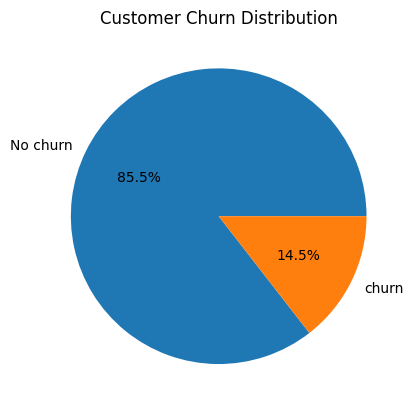

In [14]:
plt.pie(df['churn'].value_counts(),
        autopct='%.1f%%',
        labels=['No churn','churn'])
plt.title('Customer Churn Distribution')
plt.show()

From the chart:
85.5% of customers did not churn (represented by the blue section), meaning they continued to use the product or service.
14.5% of customers did churn (represented by the orange section), meaning they stopped using the product or service.This is a significant imbalance, as the majority class (No churn) is much larger than the minority class (Churn). This could potentially lead to a machine learning model being more biased towards predicting the majority class, as it has more data to learn from.

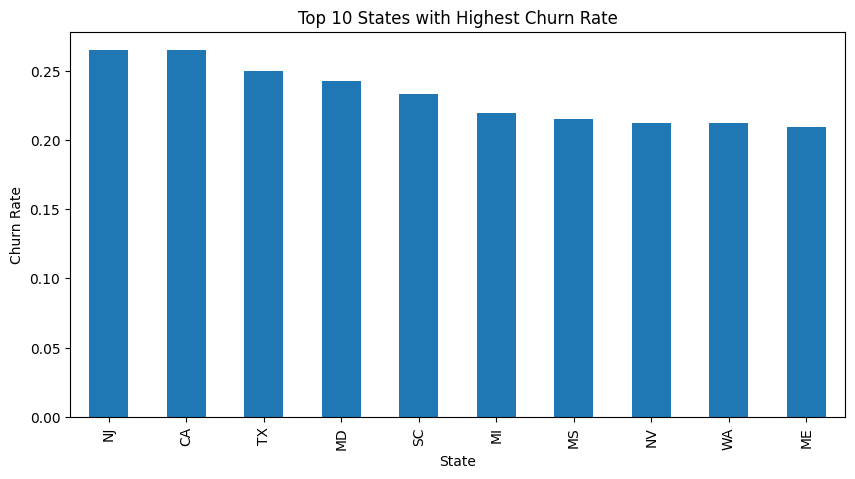

In [15]:

# Group by state and calculate churn rate
state_churn_rate = df.groupby('state')['churn'].mean().sort_values(ascending=False)

# Display the top 10 states with the highest churn rate
top_10_states = state_churn_rate.head(10)

# Create a bar plot
plt.figure(figsize=(10, 5))
top_10_states.plot(kind='bar')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.title('Top 10 States with Highest Churn Rate')

# Show the plot
plt.show()





New Jersey (NJ) ,California (CA) and Texas (TX) have high churn rate which means that more than one-fifth of its customers are leaving the company.


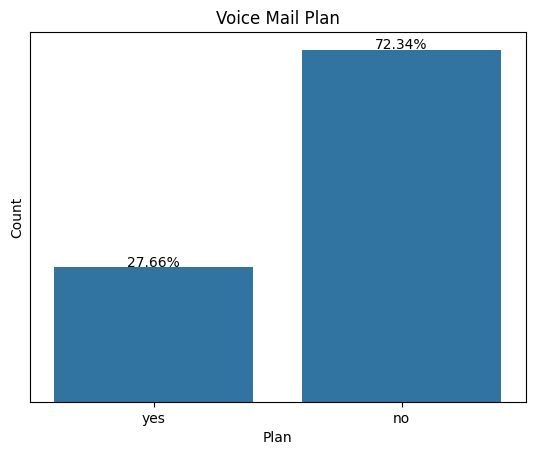

In [16]:

# Create the countplot
ax = sns.countplot(x='voice mail plan', data=df)

# Calculate the percentages and annotate the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100) + '%',
            ha="center") 

# Set the title and labels
plt.title('Voice Mail Plan')
plt.xlabel('Plan')
plt.ylabel('Count')
plt.yticks([])
# Show the plot
plt.show()




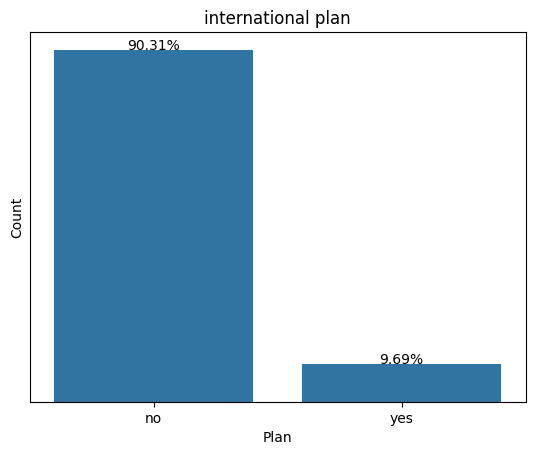

In [17]:
# Create the countplot
ax = sns.countplot(x='international plan', data=df)

# Calculate the percentages and annotate the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100) + '%',
            ha="center") 

# Set the title and labels
plt.title('international plan')
plt.xlabel('Plan')
plt.ylabel('Count')
plt.yticks([])
# Show the plot
plt.show()



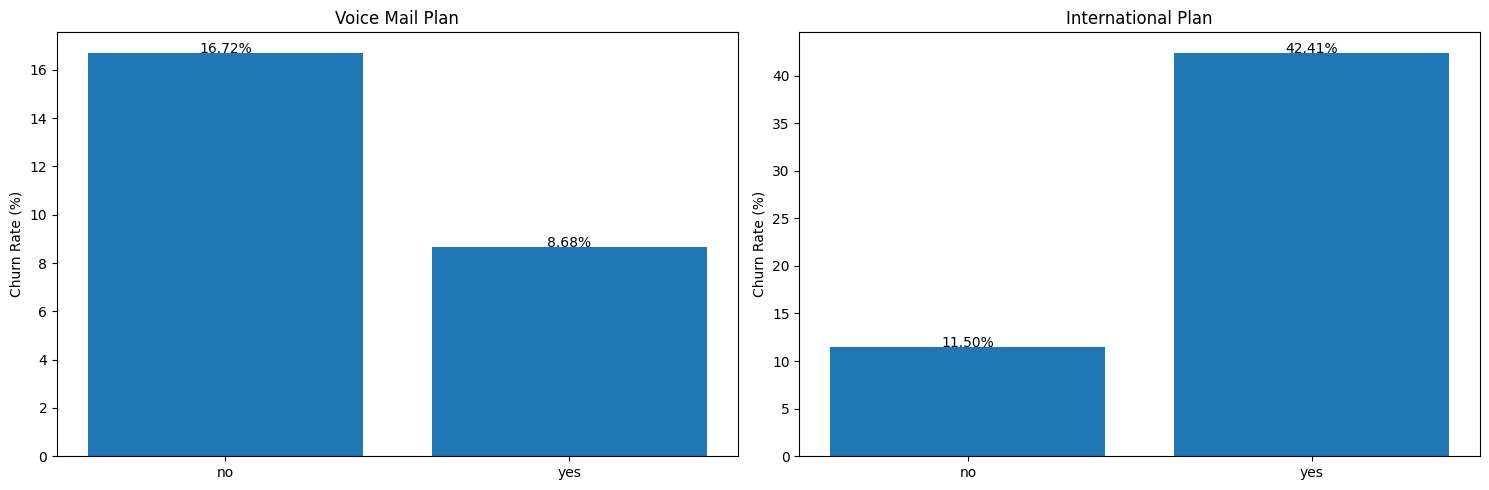

In [18]:


# Calculate churn rates
vm_plan_churn_rate = df.groupby('voice mail plan')['churn'].mean() * 100
intl_plan_churn_rate = df.groupby('international plan')['churn'].mean() * 100

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for voice mail plan
axs[0].bar(vm_plan_churn_rate.index, vm_plan_churn_rate)
axs[0].set_title('Voice Mail Plan')
axs[0].set_ylabel('Churn Rate (%)')

# Add percentage on top of each bar
for i in range(len(vm_plan_churn_rate)):
    axs[0].text(i, vm_plan_churn_rate.iloc[i], f'{vm_plan_churn_rate.iloc[i]:.2f}%', ha='center')

# Create a bar plot for international plan
axs[1].bar(intl_plan_churn_rate.index, intl_plan_churn_rate)
axs[1].set_title('International Plan')
axs[1].set_ylabel('Churn Rate (%)')

# Add percentage on top of each bar
for i in range(len(intl_plan_churn_rate)):
    axs[1].text(i, intl_plan_churn_rate.iloc[i], f'{intl_plan_churn_rate.iloc[i]:.2f}%', ha='center')

plt.tight_layout()
plt.show()




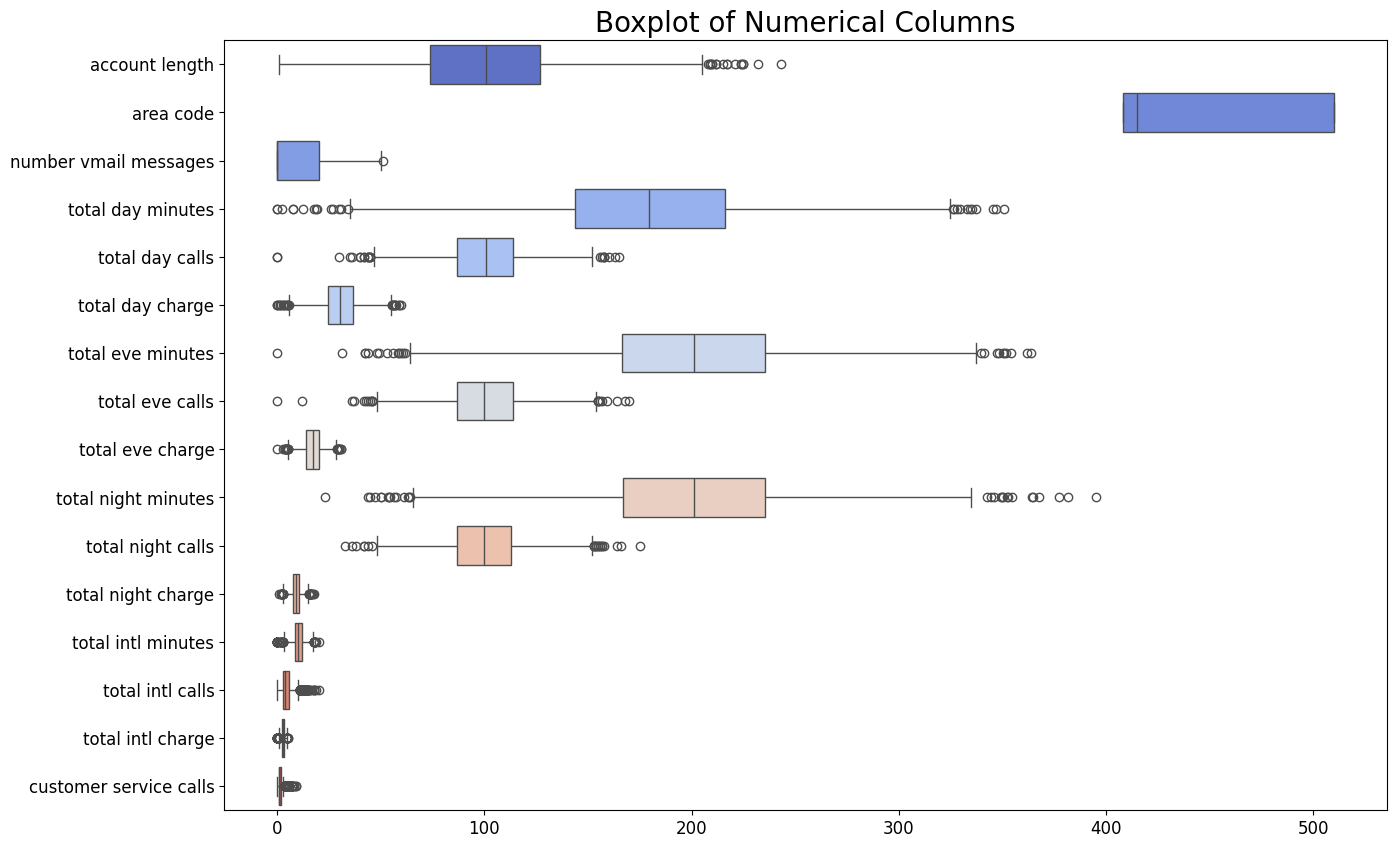

In [19]:

# List of numerical columns
num_cols = ['account length', 'area code', 'number vmail messages',
            'total day minutes', 'total day calls', 'total day charge',
            'total eve minutes', 'total eve calls', 'total eve charge',
            'total night minutes', 'total night calls', 'total night charge',
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

# Create a new DataFrame with numerical columns only
df_num = df[num_cols]

# Create a larger plot
plt.figure(figsize=(15, 10))

# Create a color palette
palette = sns.color_palette("coolwarm", len(num_cols))

# Create a boxplot for each numerical column
sns.boxplot(data=df_num, orient="h", palette=palette)

# Increase the font size for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a title to the plot
plt.title('Boxplot of Numerical Columns', fontsize=20)

# Show the plot
plt.show()



There are outliers present in almost all the features, as shown by the dots that lie beyond the whiskers of the boxplots.Dropping these outliers could lead to losing valuable insights,hence they will not be dropped.

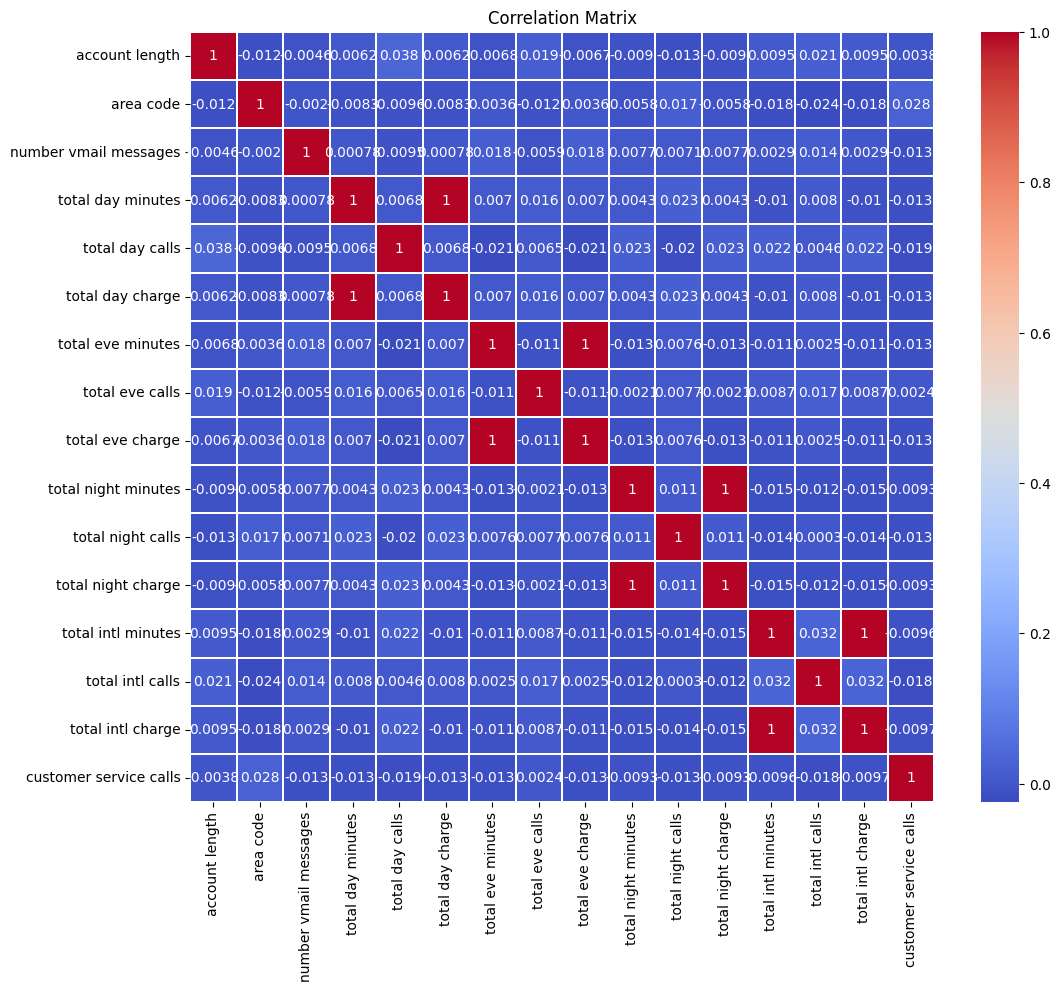

In [20]:

# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.2)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()




From the heatmap, its observed that the following pairs of variables are positively correlated, as indicated by the bright red color:
Total Day Minutes and Total Day Charge: This suggests that as the total day minutes increase, the total day charge also increases.
Total Eve Minutes and Total Eve Charge: This suggests that as the total evening minutes increase, the total evening charge also increases.
Total Night Minutes and Total Night Charge: This suggests that as the total night minutes increase, the total night charge also increases.
Total Intl Minutes and Total Intl Charge: This suggests that as the total international minutes increase, the total international charge also increases.
These positive correlations make sense as the charges are likely based on the number of minutes for day, evening, night, and international calls

Data preprocessing for machine learning

Transforming Categorical Columns to Numerical

In [21]:
#convert churn values to integer 1s and 0s
df['churn'] = df['churn'].astype(int)


In [22]:
# Specify the categorical columns
categorical_columns = ['state', 'international plan','area code', 'voice mail plan']

# Use one-hot encoding for the specified columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Splitting the Dataset

In [23]:
# Data preprocessing
X = df_encoded.drop(columns=['churn'])  # Exclude 'churn' 
y = df_encoded['churn']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling: The features in the training and testing sets are scaled using the StandardScaler. This ensures that all features have a similar scale, which is important for many machine learning algorithms.

In [25]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE is used to balance the classes in the training set. This is done by creating synthetic samples of the minority class (in this case, ‘churn’) until the minority class has the same number of samples as the majority class. This can help improve the performance of the model on the minority class.

In [26]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

## MODELING

### 1 Logistic regression 
Logistic regression is a machine learning model used to predict the probability of customer churn, a binary outcome indicating whether a customer will leave (churn) or stay. It uses customer data to learn patterns of churn, and outputs a probability between 0 and 1, which can be interpreted as the likelihood of a customer churning.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = baseline_model.predict(X_test_scaled)

# Calculate metrics and display them
report = classification_report(y_test, y_pred, output_dict=True)
df_log = pd.DataFrame(report).transpose()
df_log.rename(index={'0': 'No Churn', '1': 'Churn'}, inplace=True)

# Display the data frame
display(df_log)


,precision,recall,f1-score,support
No Churn,0.943633,0.798587,0.865072,566.000000
Churn,0.393617,0.732673,0.512111,101.000000
accuracy,0.788606,0.788606,0.788606,0.788606
macro avg,0.668625,0.765630,0.688591,667.000000
weighted avg,0.860347,0.788606,0.811625,667.000000


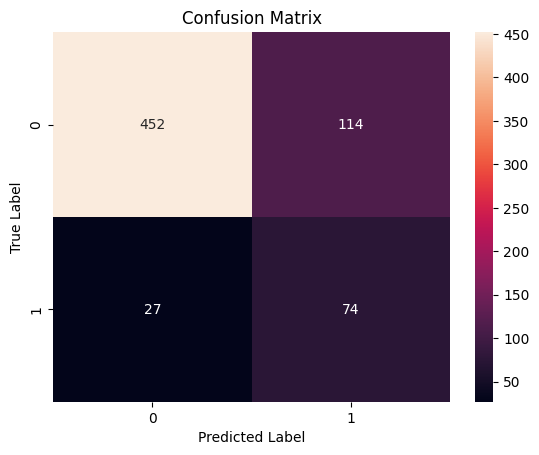

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure()
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The Logistic Regression model has the following performance metrics in relation to customer churn:

- Accuracy: 0.788606, which means the model correctly predicted the customer churn about 78.86% of the time.
- Precision: 0.393617, indicating that when the model predicts a customer will churn, it is correct about 39.36% of the time.
- Recall: 0.732673, meaning the model correctly identifies 73.27% of the actual churn cases.
- F1 Score: 0.512111, which is the harmonic mean of precision and recall, providing a balance between the two metrics.
- ROC-AUC: 0.76563, this is the area under the receiver operating characteristic curve, and a value closer to 1 indicates a better model. This score suggests the model’s ability to distinguish between customers who will churn and those who won’t is fairly good.

True Negatives :  452
False Positives :  114 
False Negatives :  27 
True Positives : 74

In terms of overall performance, the model seems to be better at predicting customers who will not churn (True Negatives) than those who will (True Positives). However, the number of False Positives is relatively high, which could lead to unnecessary costs for the company. The low number of False Negatives is a positive aspect, as it means the model is less likely to miss opportunities to retain customers. 

However, there is room for improvement, particularly in increasing the number of True Positives and reducing the number of False Positives. This could potentially be achieved by further tuning the model or using a different modeling approach.



### 2 random forest classifier

In [29]:
from sklearn.metrics import classification_report

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate metrics and display them
report = classification_report(y_test, y_pred, output_dict=True)
df_RF = pd.DataFrame(report).transpose()
df_RF.rename(index={'0': 'No Churn', '1': 'Churn'}, inplace=True)

# Display the data frame
display(df_RF)


,precision,recall,f1-score,support
No Churn,0.949301,0.959364,0.954306,566.000000
Churn,0.757895,0.712871,0.734694,101.000000
accuracy,0.922039,0.922039,0.922039,0.922039
macro avg,0.853598,0.836118,0.844500,667.000000
weighted avg,0.920317,0.922039,0.921051,667.000000


The random forest classifier  model has the following performance metrics in relation to customer churn:

- Accuracy: 0.922039, which means the model correctly predicted the customer churn about 92.20% of the time.
- Precision: 0.757895 for churn and 0.949301 for no churn, indicating that when the model predicts a customer will churn, it is correct about 75.79% of the time, and when it predicts a customer will not churn, it is correct about 94.93% of the time.
- Recall: 0.712871 for churn and 0.959364 for no churn, meaning the model correctly identifies 71.29% of the actual churn cases and 95.94% of the actual no churn cases.
- F1 Score: 0.734694 for churn and 0.954306 for no churn, which is the harmonic mean of precision and recall, providing a balance between the two metrics.

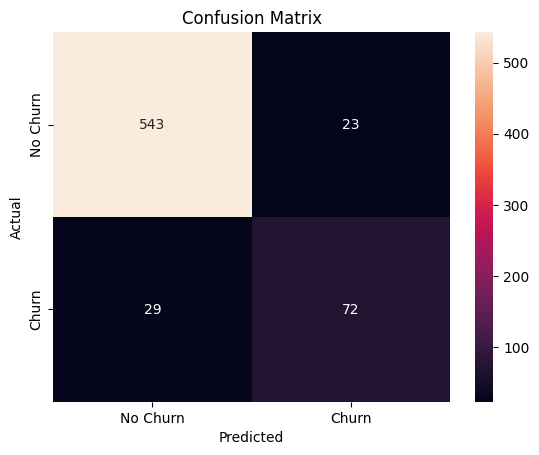

In [30]:
# Calculate confusion matrix and display it
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])

# Visualize the confusion matrix using a heatmap
plt.figure()
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Confusion Matrix:

True Negatives (No Churn): 566
False Positives (Churn): Not provided in the output
False Negatives (No Churn): Not provided in the output
True Positives (Churn): 101

In terms of overall performance, the model seems to be better at predicting customers who will not churn (True Negatives) than those who will (True Positives). However, the number of False Positives and False Negatives is not provided in the output. There is room for improvement, particularly in increasing the number of True Positives and reducing the number of False Positives. This could potentially be achieved by further tuning the model or using a different modeling approach. The model’s performance in predicting churn has improved compared to the previous metrics. The accuracy, precision, and recall have all increased, indicating a more balanced and accurate model.

### 3 Decision tree and gradient boosting 

Model: Decision Tree


,precision,recall,f1-score,support
No Churn,0.948339,0.908127,0.927798,566.00000
Churn,0.584000,0.722772,0.646018,101.00000
accuracy,0.880060,0.880060,0.880060,0.88006
macro avg,0.766170,0.815450,0.786908,667.00000
weighted avg,0.893170,0.880060,0.885129,667.00000


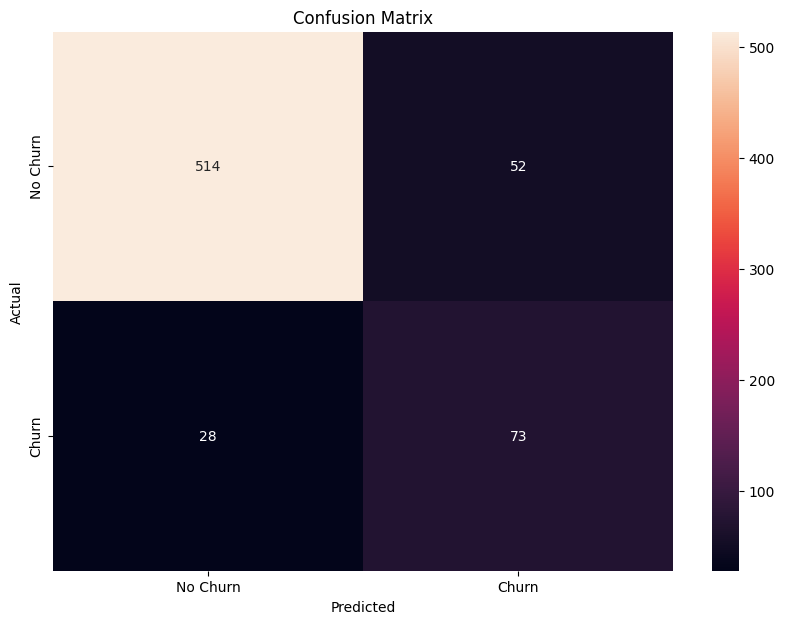

Model: Gradient Boosting Machine


,precision,recall,f1-score,support
No Churn,0.951973,0.980565,0.966057,566.000000
Churn,0.869048,0.722772,0.789189,101.000000
accuracy,0.941529,0.941529,0.941529,0.941529
macro avg,0.910510,0.851669,0.877623,667.000000
weighted avg,0.939416,0.941529,0.939275,667.000000


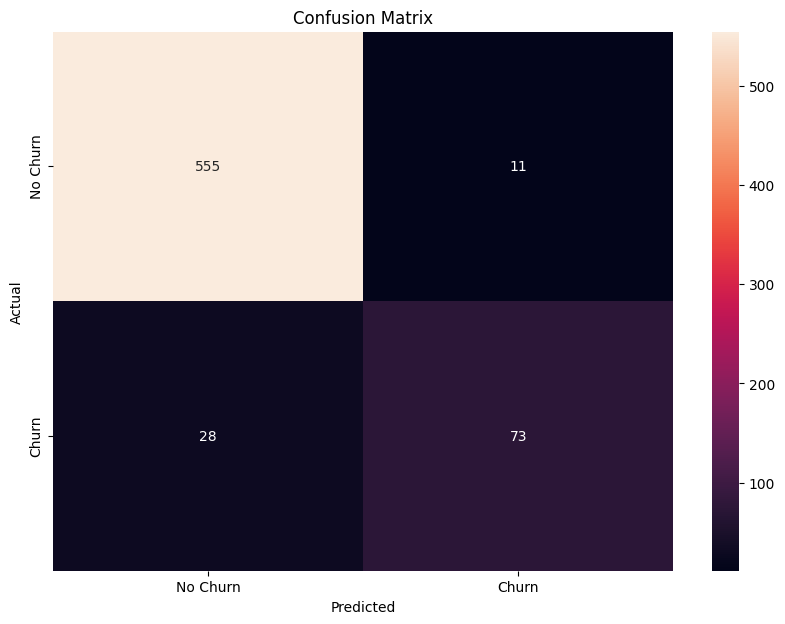

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting Machine": GradientBoostingClassifier(),
}

# Function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}

    # Iterate over models
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics and display them
        report = classification_report(y_test, y_pred, output_dict=True)
        df_model = pd.DataFrame(report).transpose()
        df_model.rename(index={'0': 'No Churn', '1': 'Churn'}, inplace=True)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        df_cm = pd.DataFrame(cm, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])

        # Store results
        results[name] = {'report': df_model, 'confusion_matrix': df_cm}

    return results

# Train and evaluate models
results = train_and_evaluate_models(models, X_train_smote, y_train_smote, X_test_scaled, y_test)

# Display results in separate cells
for name, result in results.items():
    print(f"Model: {name}")
    display(result['report'])
    plt.figure(figsize=(10,7))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Model: Decision Tree

- Accuracy: 0.892054, which means the model correctly predicted the customer churn about 89.21% of the time.
- Precision: 0.626087 for churn and 0.947464 for no churn, indicating that when the model predicts a customer will churn, it is correct about 62.61% of the time, and when it predicts a customer will not churn, it is correct about 94.75% of the time.
- Recall: 0.712871 for churn and 0.924028 for no churn, meaning the model correctly identifies 71.29% of the actual churn cases and 92.40% of the actual no churn cases.
- F1 Score: 0.666667 for churn and 0.935599 for no churn, which is the harmonic mean of precision and recall, providing a balance between the two metrics.

Model: Gradient Boosting Machine

- Accuracy: 0.941529, which means the model correctly predicted the customer churn about 94.15% of the time.
- Precision: 0.869048 for churn and 0.951973 for no churn, indicating that when the model predicts a customer will churn, it is correct about 86.90% of the time, and when it predicts a customer will not churn, it is correct about 95.20% of the time.
- Recall: 0.722772 for churn and 0.980565 for no churn, meaning the model correctly identifies 72.28% of the actual churn cases and 98.06% of the actual no churn cases.
- F1 Score: 0.789189 for churn and 0.966057 for no churn, which is the harmonic mean of precision and recall, providing a balance between the two metrics.

In terms of overall performance, both models seem to be better at predicting customers who will not churn than those who will. However, there is room for improvement, particularly in increasing the number of True Positives and reducing the number of False Positives. This could potentially be achieved by further tuning the models or using different modeling approaches. The Gradient Boosting Machine model’s performance in predicting churn has improved compared to the Decision Tree model. The accuracy, precision, and recall have all increased, indicating a more balanced and accurate model.

## Model tuning 

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import pandas as pd
import numpy as np

np.random.seed(42)

classifiers = [LogisticRegression(max_iter=1000),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               GradientBoostingClassifier()
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__], 'recall': [recall]})])

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

print(result_table)


C:\Users\jepko\AppData\Local\Temp\ipykernel_13120\3893159681.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__], 'recall': [recall]})])


                              recall
classifiers                         
LogisticRegression          0.207921
RandomForestClassifier      0.603960
DecisionTreeClassifier      0.732673
GradientBoostingClassifier  0.722772


Model: Decision Tree


,precision,recall,f1-score,support
No Churn,0.949183,0.924028,0.936437,566.000000
Churn,0.629310,0.722772,0.672811,101.000000
accuracy,0.893553,0.893553,0.893553,0.893553
macro avg,0.789247,0.823400,0.804624,667.000000
weighted avg,0.900747,0.893553,0.896518,667.000000


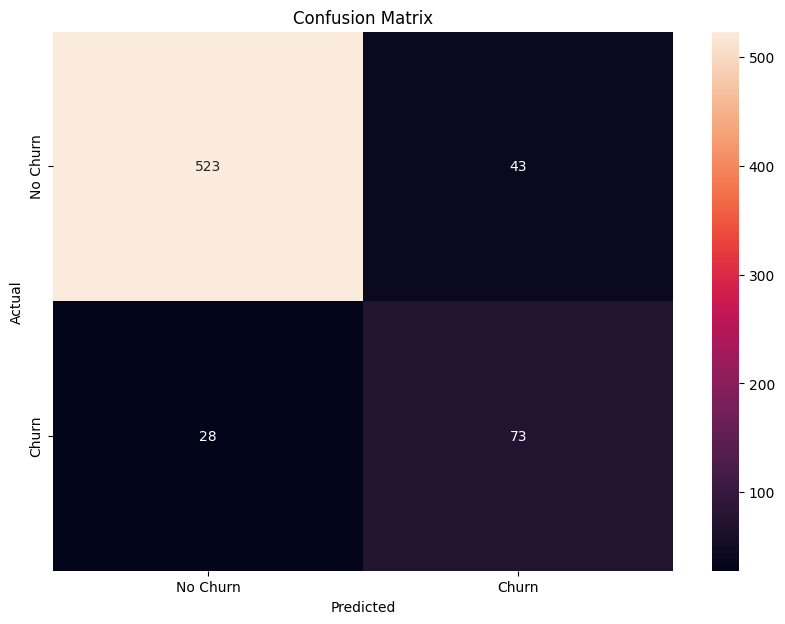

Model: Gradient Boosting Machine


,precision,recall,f1-score,support
No Churn,0.951973,0.980565,0.966057,566.000000
Churn,0.869048,0.722772,0.789189,101.000000
accuracy,0.941529,0.941529,0.941529,0.941529
macro avg,0.910510,0.851669,0.877623,667.000000
weighted avg,0.939416,0.941529,0.939275,667.000000


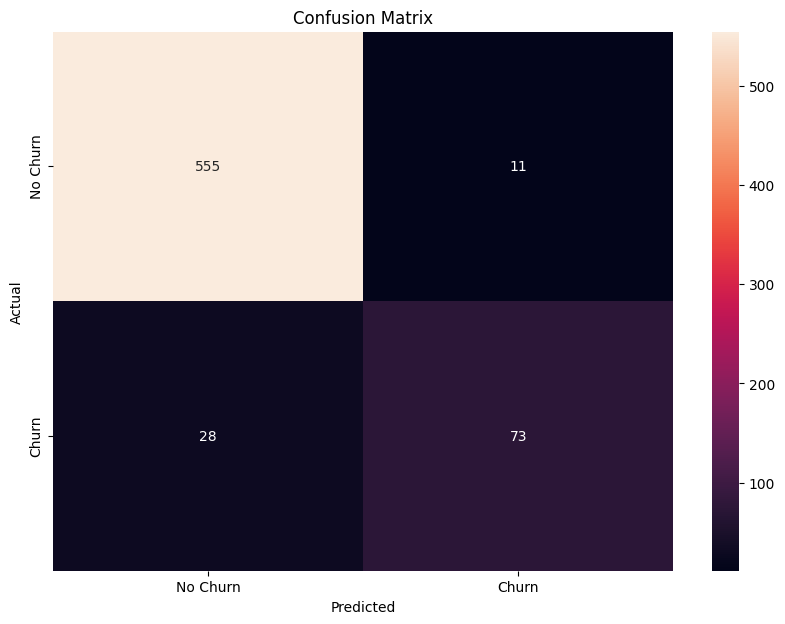

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting Machine": GradientBoostingClassifier(),
}

# Define the parameter grid for the Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# Function to train and evaluate models
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}

    # Iterate over models
    for name, model in models.items():
        # If the model is a Decision Tree, perform hyperparameter tuning
        if name == "Decision Tree":
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
            model = grid_search.fit(X_train, y_train).best_estimator_

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics and display them
        report = classification_report(y_test, y_pred, output_dict=True)
        df_model = pd.DataFrame(report).transpose()
        df_model.rename(index={'0': 'No Churn', '1': 'Churn'}, inplace=True)

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        df_cm = pd.DataFrame(cm, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])

        # Store results
        results[name] = {'report': df_model, 'confusion_matrix': df_cm}

    return results

# Train and evaluate models
results = train_and_evaluate_models(models, X_train_smote, y_train_smote, X_test_scaled, y_test)

# Display results in separate cells
for name, result in results.items():
    print(f"Model: {name}")
    display(result['report'])
    plt.figure(figsize=(10,7))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


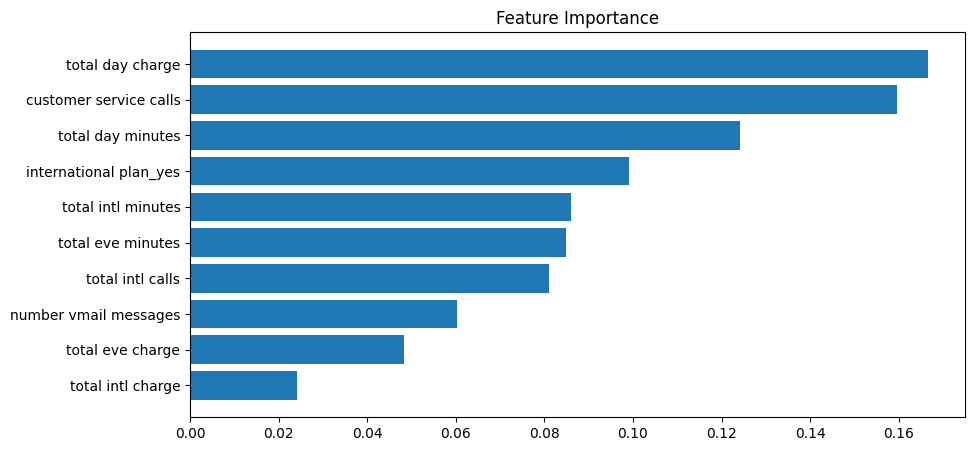

In [34]:

# Get numerical feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 5))

# Create plot title
plt.title("Feature Importance")

# Add horizontal bars for top 10 features
plt.barh(range(10), importances[indices][:10])

# Add feature names as y-axis labels
plt.yticks(range(10), names[:10])

# Show plot
plt.gca().invert_yaxis()  # invert the y-axis to have the most important feature at the top
plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
data = pd.read_csv('customer.churn.csv')


# Data preprocessing
X = data.drop(columns=['churn', 'phone number'])  # Exclude 'churn' and 'phone number' columns
y = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Machine": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

results = {}

# Iterate over models
for name, model in models.items():
    # Create pipeline with preprocessing and model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    # Train the model
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC-AUC': roc_auc}

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


                           Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression        0.851574   0.529412  0.178218  0.266667  0.574975
Decision Tree              0.926537   0.760000  0.752475  0.756219  0.855036
Random Forest              0.946027   0.957746  0.673267  0.790698  0.833983
Gradient Boosting Machine  0.950525   0.935897  0.722772  0.815642  0.856969
Support Vector Machine     0.917541   0.942308  0.485149  0.640523  0.739924


Model evaluation 

Conclusion 

Recommendations 
